In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read the Csv file
df = pd.read_csv('C:/Users/fatem/Downloads/Portfolio-Projects/Data Science Job Posting on Glassdoor/Uncleaned_DS_jobs.csv')
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [9]:
# Get the 'Job Description' from row 3
ver= df.at[3, 'Job Description']


# Write the Description to a file named 'file.txt'
with open('file.txt', 'w') as Archive:
    Archive.write(str(ver))

    
# Read the content back from the file 
with open('file.txt', 'r') as Archive:
    Content= Archive.read()

print(Content)

JOB DESCRIPTION:

Do you have a passion for Data and Machine Learning? Do you dream of working with customers on their most forward-looking AI initiatives? Does the challenge of developing modern machine learning solutions to solve real-world manufacturing problems exciting to you?

We develop software for monitoring semiconductor manufacturing process and are looking to leverage the latest technologies to address our customer's needs. You will be part of a team that investigates and builds solutions based all the data available in factories, ranging from time series data, to post manufacturing data, to production logs. You will be working side by side with application developers and customers on real world problems with actual manufacturing data.

JOB FUNCTION:

Basic and applied research in statistical machine learning, deep learning, and data science as well as signal and information processing to advance the state of the art in time series analysis of semiconductor manufacturing da

In [10]:
# Explore the dataset

df.shape
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [11]:
# Delete unnecessary columns, duplicate and null values

df= df.drop('index', axis= 1)
df= df.drop('Competitors', axis= 1)

In [12]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD)


In [13]:
# count and distinct function

sec_distinct= df['Sector'].nunique()
sec_distinct

23

In [14]:
# Remove missing rows

df= df[df['Sector'] != '-1']
df= df[df['Headquarters'] != '-1']
df= df[df['Industry'] != '-1']
df= df[df['Founded'] != -1]

In [15]:
df= df.dropna()
df= df.drop_duplicates()
df= df.reset_index(drop= True)

In [16]:
# split Location in to two columns, city and state

df[['City', 'State']]= df['Location'].str.split(',', n= 1, expand= True)
df['State'].fillna(df['Location'], inplace= True)

In [17]:
# Remove unnecessary charactors

df['Salary Estimate']= df['Salary Estimate'].str.replace(r'\$|/|K|\(|\)|Glassdoor| est|\.', '', regex= True)
df['Company Name']=df['Company Name'].str.replace(r'\n\d+(\.\d+)?$', '', regex= True)

In [18]:
df['Salary Estimate']

0      137-171 
1      137-171 
2      137-171 
3      137-171 
4      137-171 
         ...   
544    105-167 
545    105-167 
546    105-167 
547    105-167 
548    105-167 
Name: Salary Estimate, Length: 549, dtype: object

In [52]:
# split Salary Estimate in two columns, Max- and minsalary

df[['Salary_Min', 'Salary_Max']]= df['Salary Estimate'].str.split('-', expand = True)

# Extract only and all digits
df['Salary_Max']= df['Salary_Max'].str.extract('(\d+)')

# convert str into int
df['Salary_Min']= df['Salary_Min'].astype(int)
df['Salary_Max']= df['Salary_Max'].astype(int)


df['AVG']= (df['Salary_Min'] + df['Salary_Min']) / 2

In [53]:
# Filtering Job description for skills

df['Job Description']= df['Job Description'].str.lower()
df['Type of ownership']= df['Type of ownership'].str.lower()


# keys

Public = 'public'
Private = 'private'
Excel = 'excel'
Python = 'python'
Power_bi = 'power bi'
Tableau = 'tableau'
AWS = 'aws'
Spark = 'spark'
Big_data = 'big data'
Senior = 'senior'


def job_skill(skill, text):
    df[skill]= df[text].str.contains(skill)
    df[skill]= df[skill].apply(lambda x:1 if x else 0 )
    
    
job_skill(Public,'Type of ownership')
job_skill(Private,'Type of ownership')
job_skill(Excel,'Job Description')
job_skill(Python,'Job Description')
job_skill(Power_bi,'Job Description')
job_skill(AWS,'Job Description')
job_skill(Spark,'Job Description')
job_skill(Big_data,'Job Description')


# Convert True/False to Boolean 

df['Senior']= df['Job Description'].str.contains(Senior)
df['Senior']= df['Senior'].apply(lambda x: 'Senior' if x else 'None')


In [54]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,AVG,public,private,excel,python,power bi,aws,spark,big data,Senior
0,Sr Data Scientist,137-171,description\n\nthe senior data scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,nonprofit organization,...,137.0,0,0,0,0,0,1,0,0,Senior
1,Data Scientist,137-171,"secure our nation, ignite your future\n\njoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,company - public,...,137.0,1,0,0,0,0,0,0,1,None
2,Data Scientist,137-171,overview\n\n\nanalysis group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,private practice / firm,...,137.0,0,1,1,1,0,1,0,0,None
3,Data Scientist,137-171,job description:\n\ndo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,company - public,...,137.0,1,0,1,1,0,1,0,0,None
4,Data Scientist,137-171,data scientist\naffinity solutions / marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,company - private,...,137.0,0,1,1,1,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Data Scientist,105-167,job description\neducation and experience:\nat...,4.1,A-Line Staffing Solutions,"Durham, NC","Utica, MI",501 to 1000 employees,2004,company - private,...,105.0,0,1,0,1,0,0,1,1,Senior
545,Data Scientist,105-167,criterion systems seeks a data scientist to su...,3.8,"Criterion Systems, Inc.","Vienna, VA","Vienna, VA",201 to 500 employees,2005,company - private,...,105.0,0,1,1,1,0,0,0,0,None
546,Data Scientist,105-167,about foundation medicine:\n\nfoundation medic...,4.0,Foundation Medicine,"Boston, MA","Cambridge, MA",1001 to 5000 employees,2010,company - public,...,105.0,1,0,0,1,0,0,0,0,None
547,Data Scientist,105-167,summary\n\nwe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,company - private,...,105.0,0,1,1,1,1,0,0,1,None


In [55]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          549 non-null    object 
 1   Salary Estimate    549 non-null    object 
 2   Job Description    549 non-null    object 
 3   Rating             549 non-null    float64
 4   Company Name       549 non-null    object 
 5   Location           549 non-null    object 
 6   Headquarters       549 non-null    object 
 7   Size               549 non-null    object 
 8   Founded            549 non-null    int64  
 9   Type of ownership  549 non-null    object 
 10  Industry           549 non-null    object 
 11  Sector             549 non-null    object 
 12  Revenue            549 non-null    object 
 13  City               549 non-null    object 
 14  State              549 non-null    object 
 15  Salary_Min         549 non-null    int32  
 16  Salary_Max         549 non

In [56]:
# Pracentage of each skill
sum= df.iloc[:, 20:26].sum()
divission= round((sum / 549)*100, 1)
print(divission)
sum

excel       45.5
python      73.0
power bi     4.7
aws         25.3
spark       27.7
big data    21.3
dtype: float64


excel       250
python      401
power bi     26
aws         139
spark       152
big data    117
dtype: int64

In [58]:
# Only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns
#OR# df_numeric= df.select_dtypes(include= 'number')

print(numeric_columns)
df_numeric= df[numeric_columns]

Index(['Rating', 'Founded', 'Salary_Min', 'Salary_Max', 'AVG', 'public',
       'private', 'excel', 'python', 'power bi', 'aws', 'spark', 'big data'],
      dtype='object')


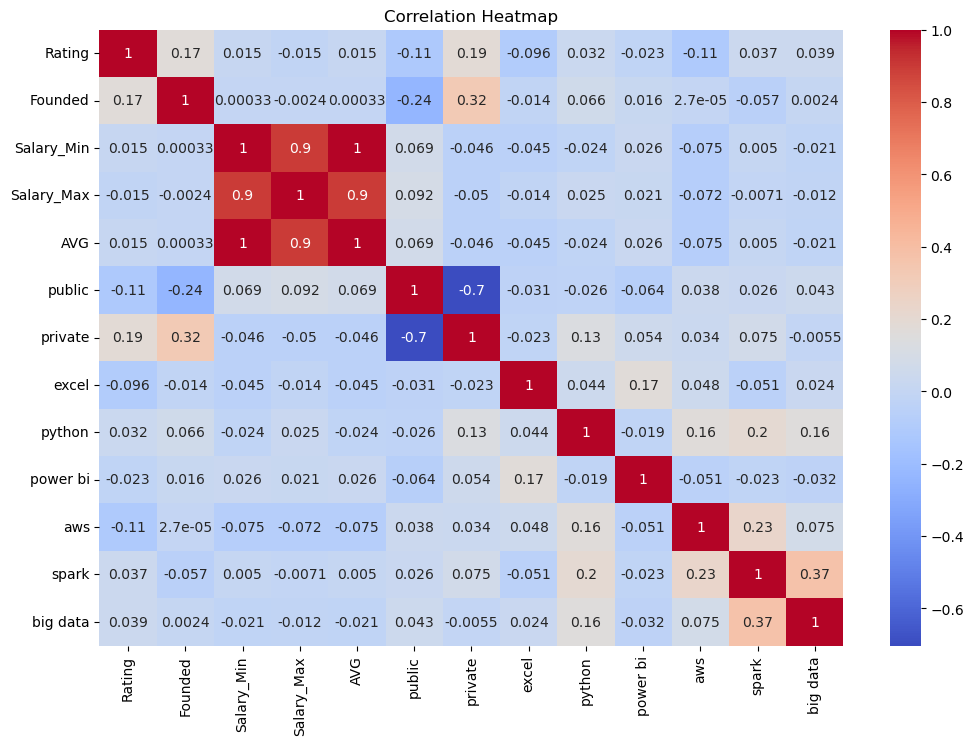

In [65]:
# Creating a heatmap 

plt.figure(figsize= (12,8))
sns.heatmap(df_numeric.corr(), annot= True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Axes: >

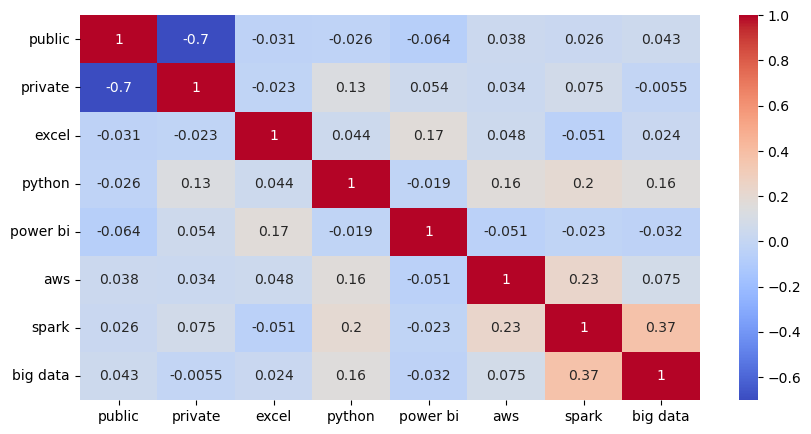

In [162]:
# Heatmap for selected columns
select_columns= ['public', 'private', 'excel', 'python', 'power bi', 'aws', 'spark', 'big data']
selected_df= df[select_columns]
dummy_df= pd.get_dummies(selected_df, drop_first= True)

plt.figure(figsize=(10,5))
#sns.heatmap(selected_df.corr(), annot= True, cmap= 'coolwarm')
sns.heatmap(dummy_df.corr(), annot= True, cmap= 'coolwarm')

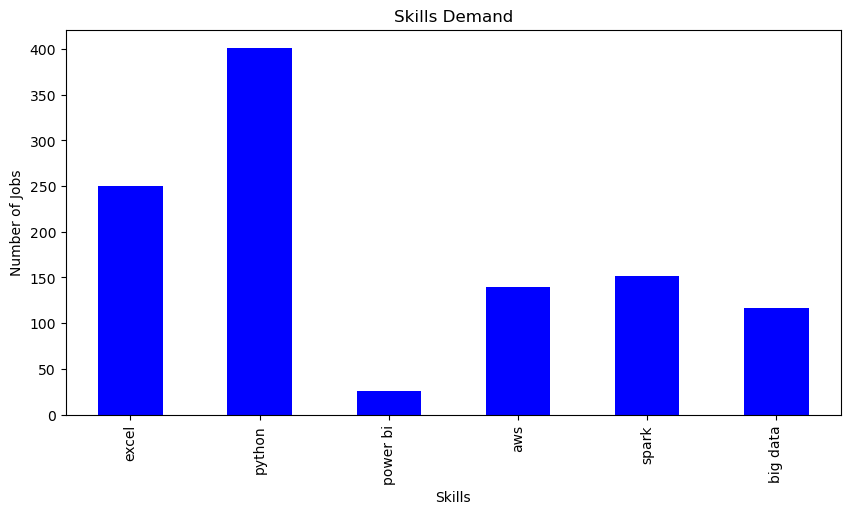

In [99]:
# Create a bar chart for skills data
skills= ['excel', 'python', 'power bi', 'aws', 'spark', 'big data']
skills_df= df[skills].sum()

plt.figure(figsize=(10,5))
skills_df.plot(kind= 'bar', stacked= True, colormap= 'winter')
plt.title('Skills Demand')
plt.xlabel('Skills')
plt.ylabel('Number of Jobs')
plt.show()

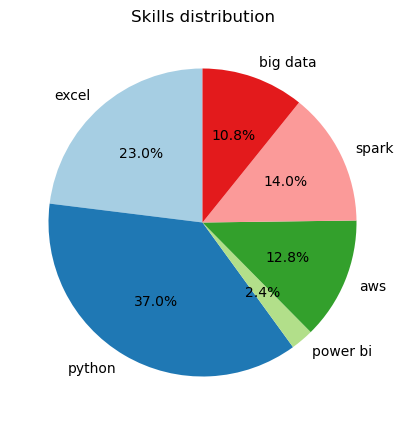

In [125]:
# Pie chart

plt.figure(figsize=(10,5))
skills_df.plot(kind= 'pie', labels= skills, autopct='%1.1f%%', startangle= 90, colors= plt.cm.Paired.colors)
plt.title('Skills distribution')
plt.show()

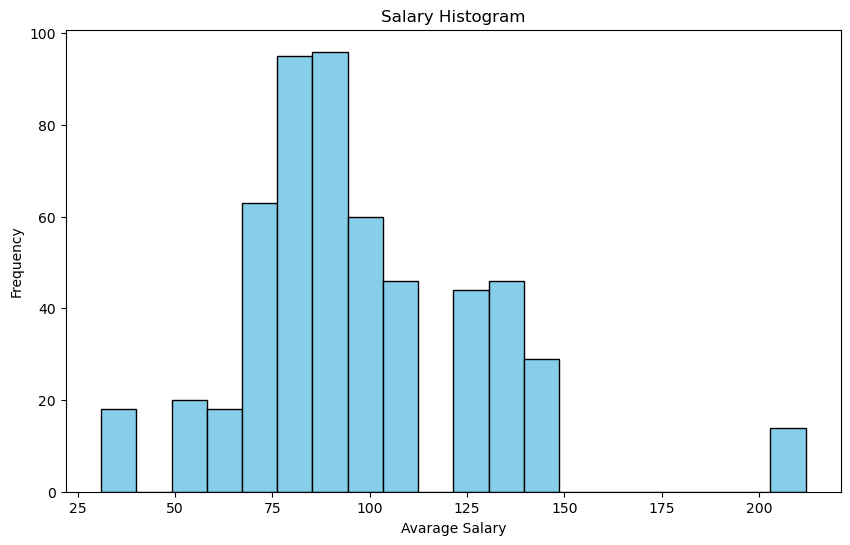

In [141]:
# Histogram
plt.figure(figsize=(10,6))
plt.hist(df['AVG'], bins= 20, color='skyblue', edgecolor='black')
plt.title('Salary Histogram')
plt.xlabel('Avarage Salary')
plt.ylabel('Frequency')
plt.show()

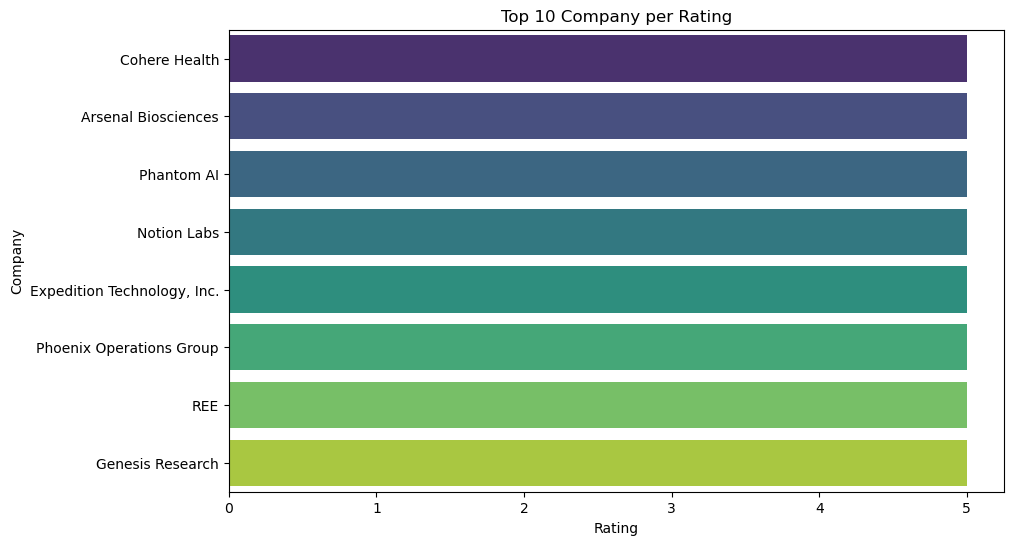

In [152]:
# Top 10 company per rating

top_companies= df.nlargest(10, 'Rating')

plt.figure(figsize=(10,6))
sns.barplot(x= 'Rating', y= 'Company Name', data= top_companies, palette= 'viridis')
plt.title('Top 10 Company per Rating')
plt.xlabel('Rating')
plt.ylabel('Company')
plt.show()

<Axes: ylabel='count'>

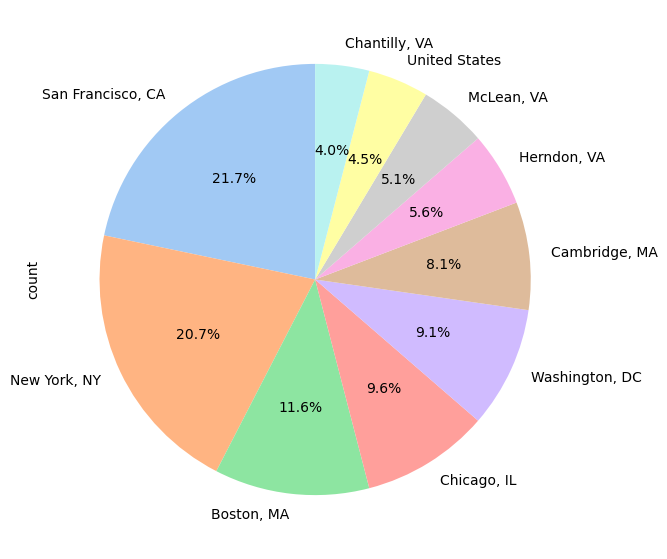

In [161]:
# Top 10 most frequent Job location

plt.figure(figsize=(10,7))
df['Location'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))


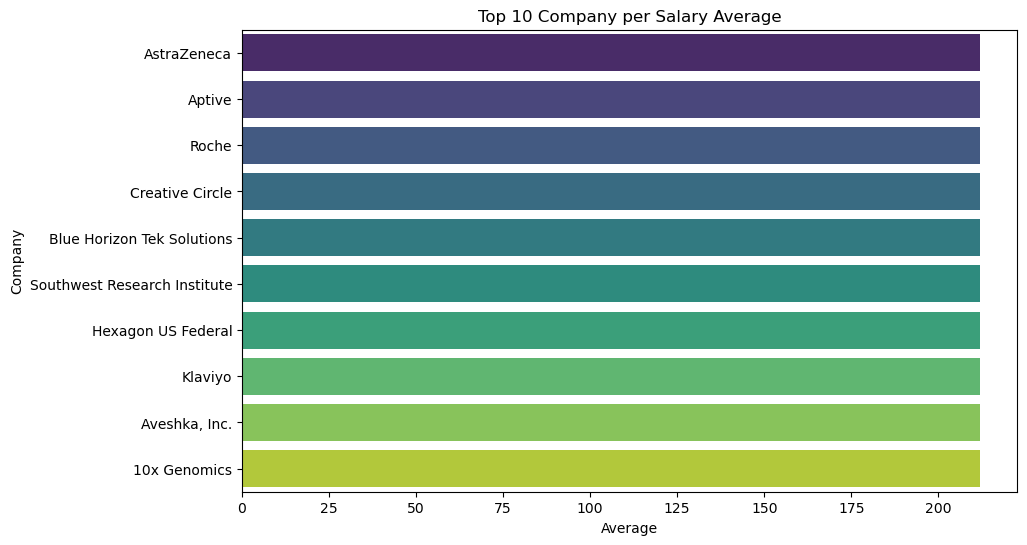

In [167]:
# Top companies by Salary average
df_sorted=df.sort_values(by= 'AVG', ascending= False)
top_companies_AVG= df_sorted.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= 'AVG', y= 'Company Name', data= top_companies_AVG, palette= 'viridis')
plt.title('Top 10 Company per Salary Average')
plt.xlabel('Average')
plt.ylabel('Company')
plt.show()
